# Denver Nuggets and Crime
## The effect a Denver Nuggets win/lose streak has on Crime in Denver

### Contents
- Data Preparation
- Denver Nuggets results
- Crime in Denver
- Denver Nuggets Form
- Denver Nuggets Streaks

In [49]:
import os.path
import datetime
import pandas as pd
import numpy as np
import pylab
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
%matplotlib inline

# Data Preparation

In [50]:
if not os.path.exists( "../../data/prep/600_NBA.csv" ):
    print("Missing dataset file")

In [51]:
nba = pd.read_csv("../../data/prep/600_NBA.csv", index_col="Date", parse_dates=True)
nba.shape

(5354, 8)

Sorting the dates of the games...

In [52]:
nba.sort_index(ascending=True)

,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS.1,Attend.,Result,Difference
Date,,,,,,,,
2007-10-30,7:30 pm,Houston Rockets,95,Los Angeles Lakers,93,18997.0,Away Win,2
2007-10-31,8:30 pm,Seattle SuperSonics,103,Denver Nuggets,120,19380.0,Home Win,-17
2007-10-31,7:30 pm,Chicago Bulls,103,New Jersey Nets,112,17342.0,Home Win,-9
2007-10-31,7:00 pm,Philadelphia 76ers,97,Toronto Raptors,106,19800.0,Home Win,-9
2007-11-02,8:00 pm,Washington Wizards,83,Boston Celtics,103,18624.0,Home Win,-20
2007-11-02,7:30 pm,Philadelphia 76ers,96,Chicago Bulls,85,22034.0,Away Win,11
2007-11-02,7:30 pm,Golden State Warriors,114,Los Angeles Clippers,120,19060.0,Home Win,-6
2007-11-02,7:00 pm,Denver Nuggets,99,Minnesota Timberwolves,91,19443.0,Away Win,8
2007-11-02,7:30 pm,Los Angeles Lakers,119,Phoenix Suns,98,18422.0,Away Win,21


# Denver Nuggets

We'll look at the Denver Nuggets...

In [53]:
nug = nba[(nba.values  == "Denver Nuggets")]

In [54]:
nug.head()

,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS.1,Attend.,Result,Difference
Date,,,,,,,,
2007-10-31,8:30 pm,Seattle SuperSonics,103,Denver Nuggets,120,19380.0,Home Win,-17
2007-11-02,7:00 pm,Denver Nuggets,99,Minnesota Timberwolves,91,19443.0,Away Win,8
2007-11-04,6:00 pm,New Orleans Hornets,93,Denver Nuggets,88,13156.0,Away Win,5
2007-11-06,7:30 pm,Denver Nuggets,112,New York Knicks,119,19763.0,Home Win,-7
2007-11-07,7:30 pm,Denver Nuggets,93,Boston Celtics,119,18624.0,Home Win,-26


We'll look at their home games first. We assign 1 point to a win, 0 for a draw and -1 for a loss. This will be important when we look at the form and streaks. 

In [55]:
nugHome = nug[nug['Home/Neutral'] == 'Denver Nuggets']

In [56]:
conditions = [
    (nugHome['PTS.1'] > nugHome['PTS']),
    (nugHome['PTS'] == nugHome['PTS.1'])]
choices = [1, 0]
nugHome['nug Res'] = np.select(conditions, choices, default=-1)

C:\Users\Cathal Mc Connell\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [57]:
nugHome.head()

,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS.1,Attend.,Result,Difference,nug Res
Date,,,,,,,,,
2007-10-31,8:30 pm,Seattle SuperSonics,103,Denver Nuggets,120,19380.0,Home Win,-17,1
2007-11-04,6:00 pm,New Orleans Hornets,93,Denver Nuggets,88,13156.0,Away Win,5,-1
2007-11-12,7:00 pm,Cleveland Cavaliers,100,Denver Nuggets,122,19155.0,Home Win,-22,1
2007-11-14,7:00 pm,Portland Trail Blazers,93,Denver Nuggets,110,13289.0,Home Win,-17,1
2007-11-17,7:00 pm,New York Knicks,83,Denver Nuggets,115,19679.0,Home Win,-32,1


and now their away games...

In [58]:
nugAway = nug[nug['Visitor/Neutral'] == 'Denver Nuggets']

In [59]:
conditions = [
    (nugAway['PTS'] > nugAway['PTS.1']),
    (nugAway['PTS'] == nugAway['PTS.1'])]
choices = [1, 0]
nugAway['nug Res'] = np.select(conditions, choices, default=-1)

C:\Users\Cathal Mc Connell\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [60]:
nugAway.head()

,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS.1,Attend.,Result,Difference,nug Res
Date,,,,,,,,,
2007-11-02,7:00 pm,Denver Nuggets,99,Minnesota Timberwolves,91,19443.0,Away Win,8,1
2007-11-06,7:30 pm,Denver Nuggets,112,New York Knicks,119,19763.0,Home Win,-7,-1
2007-11-07,7:30 pm,Denver Nuggets,93,Boston Celtics,119,18624.0,Home Win,-26,-1
2007-11-09,8:00 pm,Denver Nuggets,118,Washington Wizards,92,20173.0,Away Win,26,1
2007-11-10,7:00 pm,Denver Nuggets,113,Indiana Pacers,106,12748.0,Away Win,7,1


We'll combine the 2 dataframes

In [61]:
fram1 = [nugHome, nugAway]
nugRes = pd.concat(fram1, axis = 0)

In [62]:
nugRes.tail()

,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS.1,Attend.,Result,Difference,nug Res
Date,,,,,,,,,
2017-04-02,6:00 pm,Denver Nuggets,116,Miami Heat,113,19600.0,Away Win,3,1
2017-04-04,8:00 pm,Denver Nuggets,134,New Orleans Pelicans,131,16050.0,Away Win,3,1
2017-04-05,8:00 pm,Denver Nuggets,104,Houston Rockets,110,18055.0,Home Win,-6,-1
2017-04-11,8:30 pm,Denver Nuggets,109,Dallas Mavericks,91,20333.0,Away Win,18,1
2017-04-12,8:00 pm,Denver Nuggets,111,Oklahoma City Thunder,105,18203.0,Away Win,6,1


The index is sorted again

In [63]:
nugRes = nugRes.sort_index()

A sample plot of a months games...

<function matplotlib.pyplot.show>

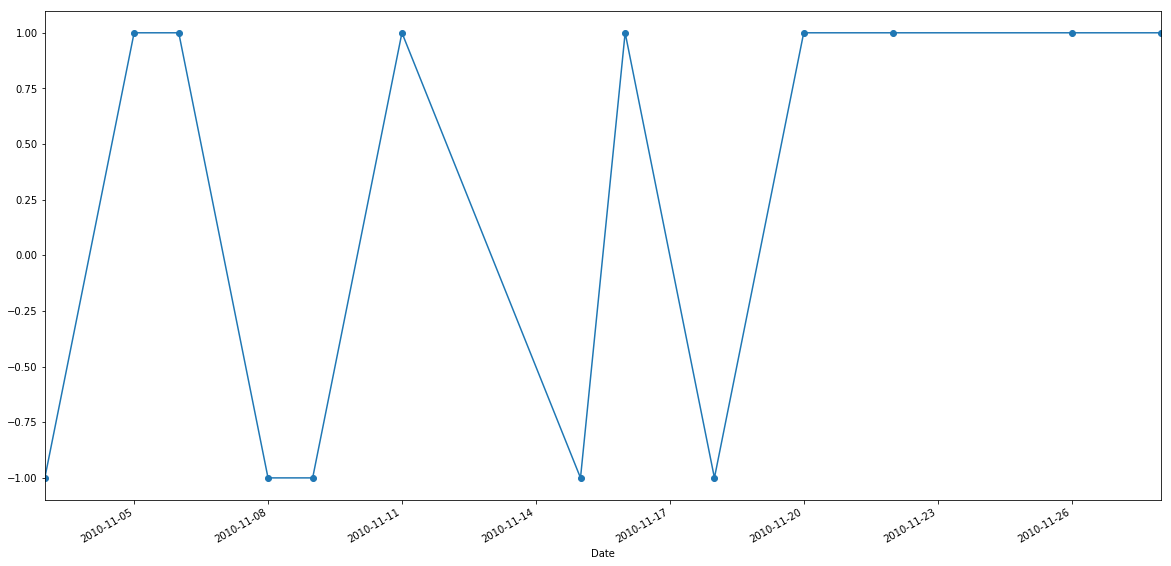

In [64]:
ctest2 = nugRes.loc['2010-11-02':'2010-11-30']
ctest2['nug Res'].plot(style='o-', figsize = (20, 10))
plt.show

In [65]:
ctest3 = nugRes.loc['2009-11-02':'2010-06-30']
ctest3

,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS.1,Attend.,Result,Difference,nug Res
Date,,,,,,,,,
2009-11-03,7:00 pm,Denver Nuggets,111,Indiana Pacers,93,10627.0,Away Win,18,1
2009-11-04,7:30 pm,Denver Nuggets,122,New Jersey Nets,94,15319.0,Away Win,28,1
2009-11-06,7:30 pm,Denver Nuggets,88,Miami Heat,96,19600.0,Home Win,-8,-1
2009-11-07,7:00 pm,Denver Nuggets,100,Atlanta Hawks,125,17801.0,Home Win,-25,-1
2009-11-10,7:00 pm,Denver Nuggets,90,Chicago Bulls,89,21409.0,Away Win,1,1
2009-11-11,7:00 pm,Denver Nuggets,102,Milwaukee Bucks,108,12987.0,Home Win,-6,-1
2009-11-13,8:30 pm,Los Angeles Lakers,79,Denver Nuggets,105,19141.0,Home Win,-26,1
2009-11-17,7:00 pm,Toronto Raptors,112,Denver Nuggets,130,16446.0,Home Win,-18,1
2009-11-20,7:30 pm,Denver Nuggets,99,Los Angeles Clippers,106,18155.0,Home Win,-7,-1


The unnecessary columns are now dropped...

In [66]:
nugRes= nugRes.drop('Visitor/Neutral', 1)
nugRes= nugRes.drop('PTS', 1)
nugRes= nugRes.drop('Home/Neutral', 1)
nugRes= nugRes.drop('Attend.', 1)
nugRes= nugRes.drop('PTS.1', 1)
nugRes= nugRes.drop('Result', 1)
nugRes= nugRes.drop('Difference', 1)

In [67]:
start_remove = pd.to_datetime('2017-06-01')
end_remove = pd.to_datetime('2013-01-01')

In [68]:
nugRes = nugRes.loc[(nugRes.index < start_remove) & (nugRes.index > end_remove)]

In [69]:
nugRes.head()

,Start (ET),nug Res
Date,,
2013-01-03,7:00 pm,-1
2013-01-05,7:00 pm,1
2013-01-06,6:30 pm,1
2013-01-09,7:00 pm,1
2013-01-11,7:00 pm,1


# Denver Crime

We now load in the Denver crime dataset...

In [70]:
nugcrime = pd.read_csv( "../../data/prep/700_Denver.csv", index_col="date", parse_dates=True)

In [71]:
nugcrime.head()

,Description,Lon,Lat
date,,,
2013-01-02 00:37:00,assault,-104.990480,39.728076
2013-01-02 15:00:00,vandalism,-105.023305,39.758126
2013-01-02 15:00:00,vandalism,-105.023305,39.758126
2013-01-02 15:00:00,vandalism,-105.023305,39.758126
2013-01-02 15:00:00,vandalism,-105.023305,39.758126


<function matplotlib.pyplot.show>

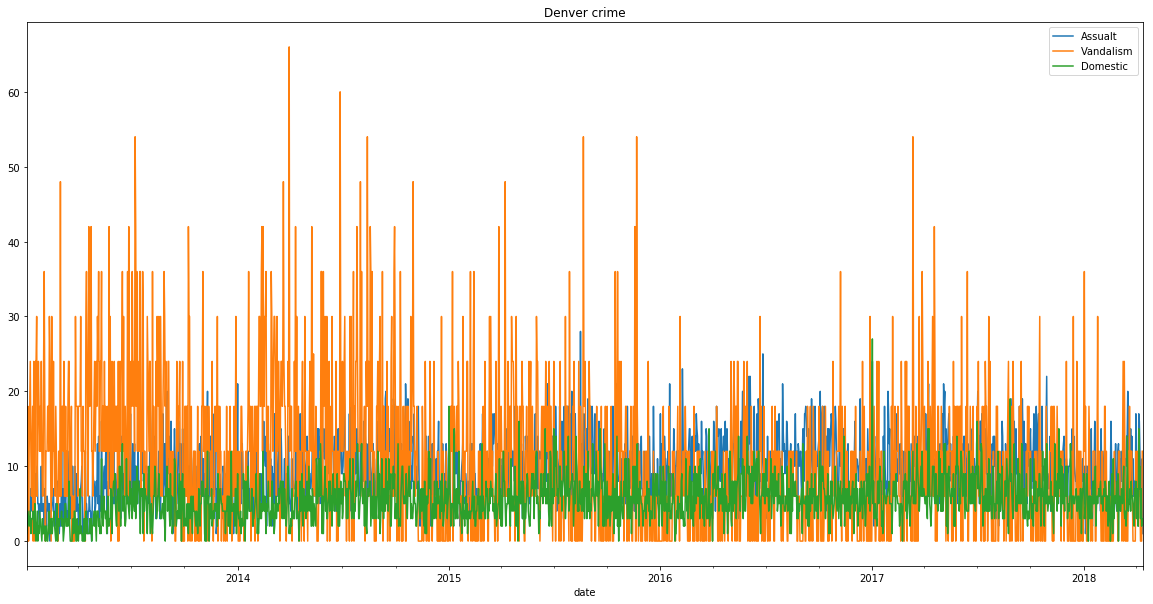

In [72]:
plt.subplot()

a1p = nugcrime[nugcrime['Description'] == "assault"]['Description']
a1p.resample('D').count().plot(figsize = (20, 10))

v1p = nugcrime[nugcrime['Description'] == "vandalism"]['Description']
v1p.resample('D').count().plot()

d1p = nugcrime[nugcrime['Description'] == "domestic"]['Description']
d1p.resample('D').count().plot()
plt.legend(['Assualt', 'Vandalism', 'Domestic'])

plt.title('Denver crime')

plt.show

<function matplotlib.pyplot.show>

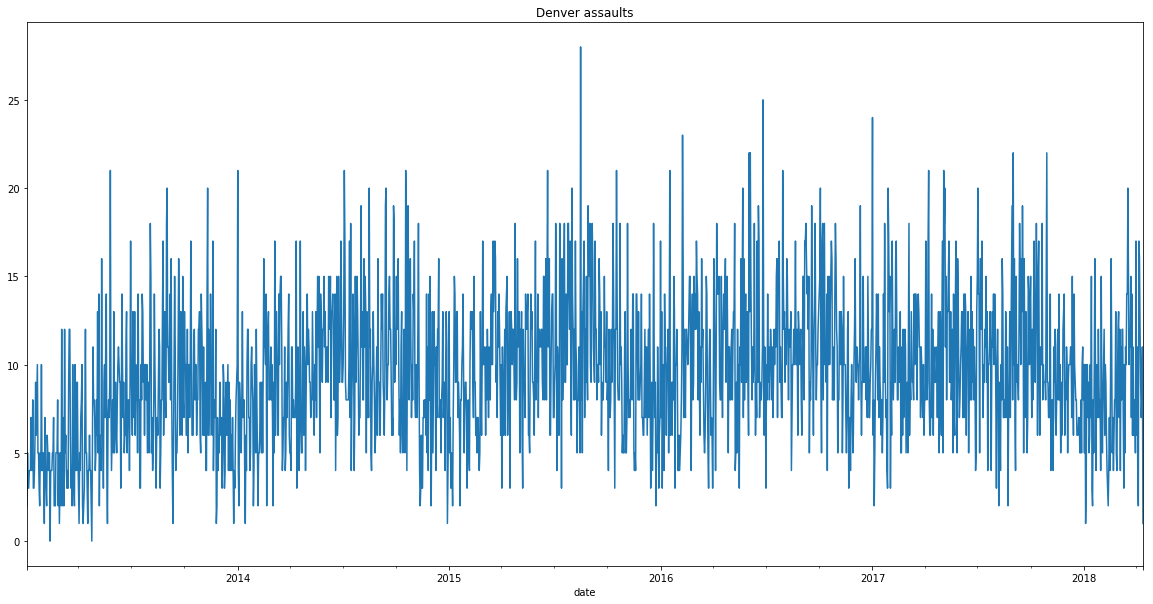

In [73]:
plt.subplot()

a1p = nugcrime[nugcrime['Description'] == "assault"]['Description']
a1p.resample('D').count().plot(figsize = (20, 10))

plt.title('Denver assaults')

plt.show

<function matplotlib.pyplot.show>

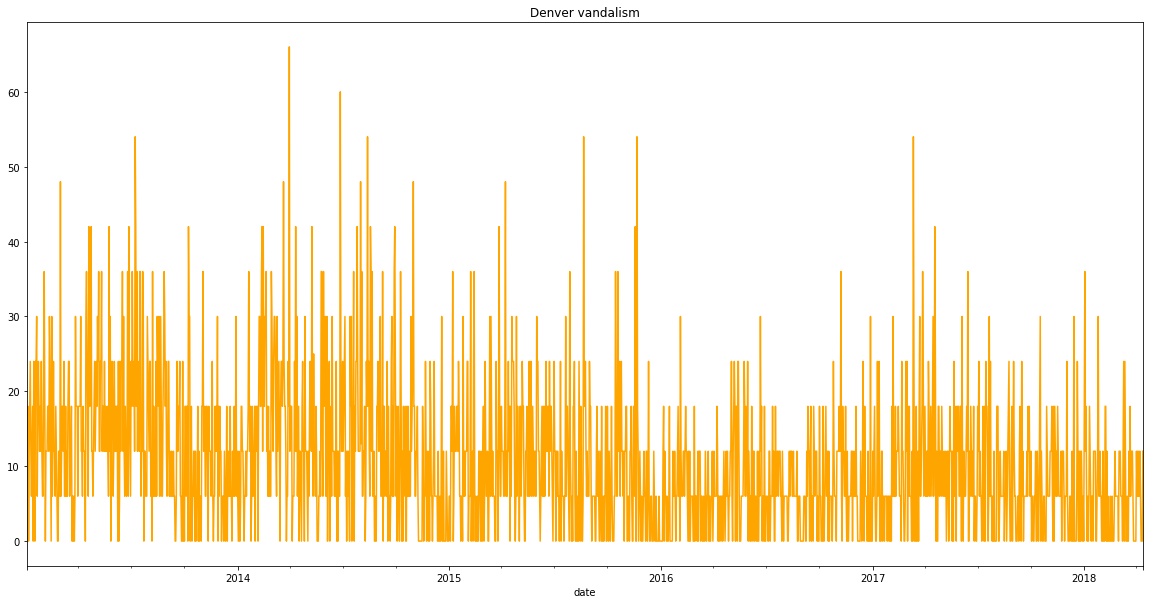

In [74]:
plt.subplot()


v1p = nugcrime[nugcrime['Description'] == "vandalism"]['Description']
v1p.resample('D').count().plot(figsize = (20, 10), color = 'orange')

plt.title('Denver vandalism')

plt.show

<function matplotlib.pyplot.show>

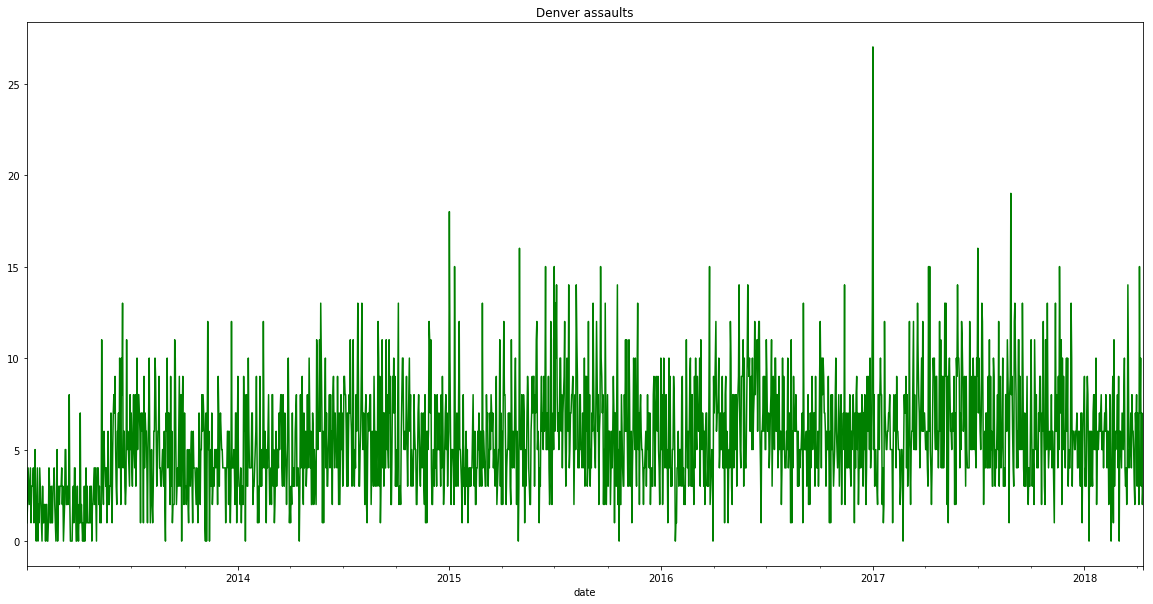

In [75]:
plt.subplot()

a1p = nugcrime[nugcrime['Description'] == "domestic"]['Description']
a1p.resample('D').count().plot(figsize = (20, 10), color = 'green')

plt.title('Denver assaults')

plt.show

# Crime vs Results

A day by day comparison of domestic violence and the games..

<function matplotlib.pyplot.show>

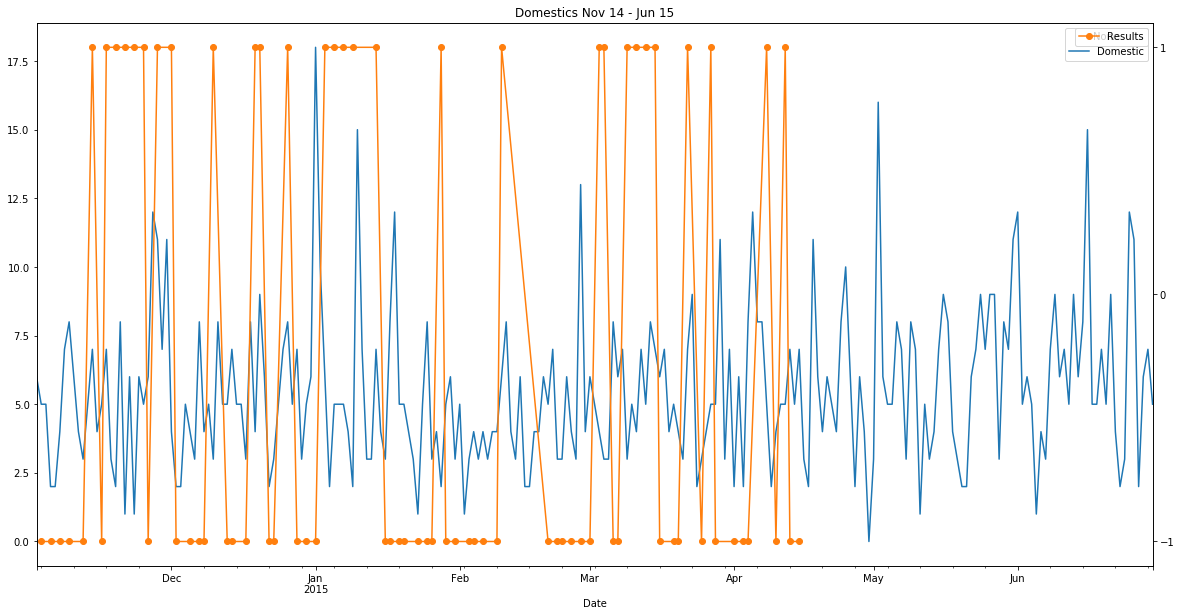

In [76]:

c1 = nugcrime.loc['2014-11-02':'2015-06-30']
ass1 = c1[c1['Description'] == "domestic"]['Description']
ass1.resample('D').count().plot()
plt.title('Domestics Nov 14 - Jun 15')
plt.legend([ 'Domestic'])

ctest5 = nugRes.loc['2014-11-02':'2015-06-30']
ctest5['nug Res'].plot(style='o-', figsize = (20, 10), secondary_y = True).yaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend([ 'Results'])
plt.show

All seasons from 2012 to 2016

<function matplotlib.pyplot.show>

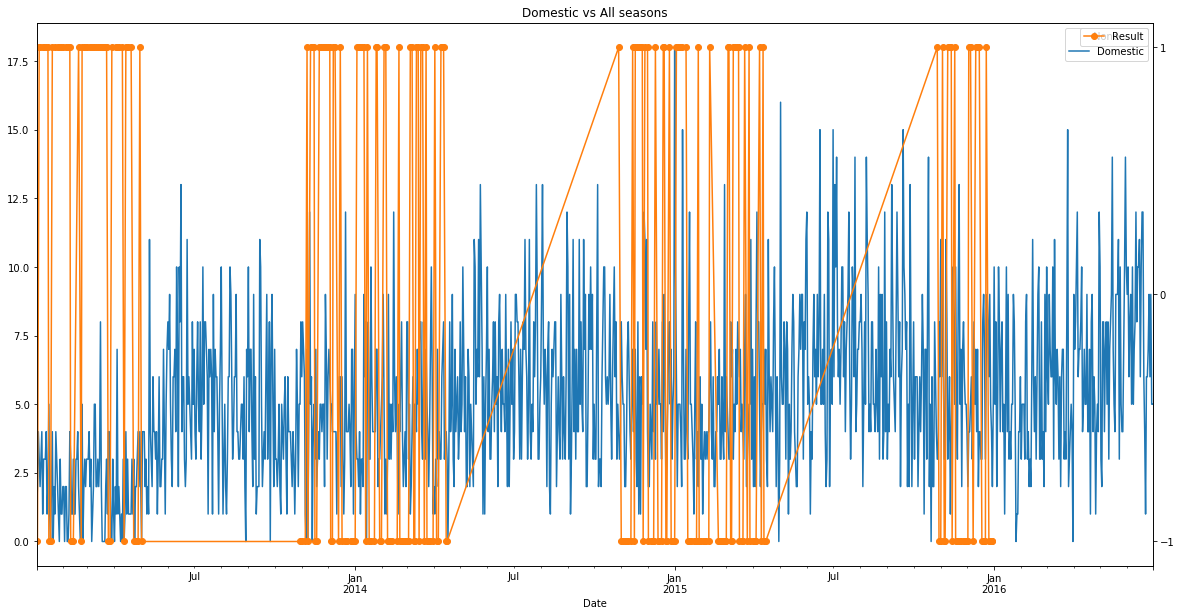

In [77]:
c1 = nugcrime.loc['2012-11-02':'2016-06-30']
ass1 = c1[c1['Description'] == "domestic"]['Description']
ass1.resample('D').count().plot()
plt.legend([ 'Domestic'])
plt.title('Domestic vs All seasons')

ctest7 = nugRes.loc['2012-11-02':'2016-01-01']
ctest7['nug Res'].plot(style='o-', figsize = (20, 10), secondary_y = True).yaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend([ 'Result'])
plt.show

# Denver Nuggets Form

Binning the games by month gives us a better idea to when the winning and losing streaks occurred. The lowest sum was in December 2014 and January 2015 with a value of -10. The highest was in March 2013 with a sum of 15.  

In [78]:
chMonthly = nugRes.resample('2M').sum()
chMonthly = chMonthly.dropna(subset = ['nug Res'])
chMonthly.sort_values(by=['nug Res'])

,nug Res
Date,
2015-01-31,-10.0
2014-03-31,-9.0
2015-03-31,-8.0
2015-11-30,-6.0
2016-01-31,-6.0
2016-11-30,-4.0
2014-01-31,-4.0
2015-05-31,-4.0
2016-05-31,-3.0


Showing the best form with all three crimes...

<function matplotlib.pyplot.show>

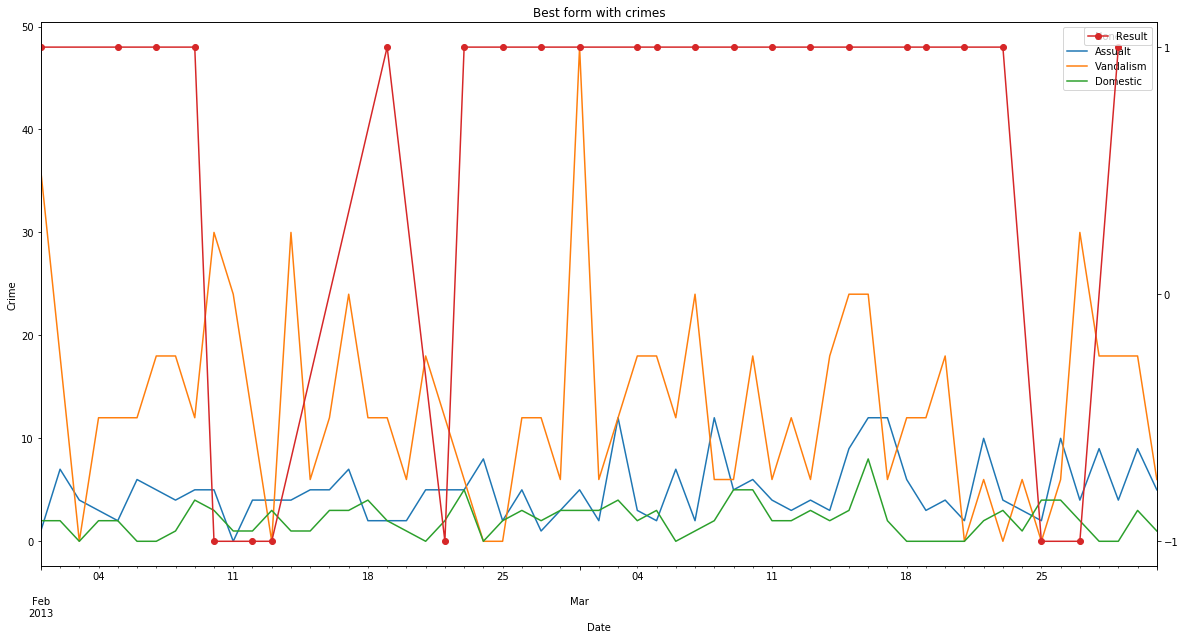

In [79]:
plt.subplot()

c = nugcrime.loc['2013-02-01':'2013-03-31']
a1 = c[c['Description'] == "assault"]['Description']
a1.resample('D').count().plot()

v1 = c[c['Description'] == "vandalism"]['Description']
v1.resample('D').count().plot()

d1 = c[c['Description'] == "domestic"]['Description']
d1.resample('D').count().plot()
plt.legend(['Assualt', 'Vandalism', 'Domestic'])
pylab.ylabel('Crime')
plt.title('Best form with crimes')

ct = nugRes.loc['2013-02-01':'2013-03-31']
ct['nug Res'].plot(style='o-', figsize = (20, 10), secondary_y = True).yaxis.set_major_locator(MaxNLocator(integer=True))


plt.legend(["Result"])
plt.show

Again, as with other teams there seems to be rises whenever a win streak is broken. However, there is a massive rise in vandalism on the 4th game won in a row. . Domestic and Assault are undramatic. 

Looking at the Nugget's worst run of form...

<function matplotlib.pyplot.show>

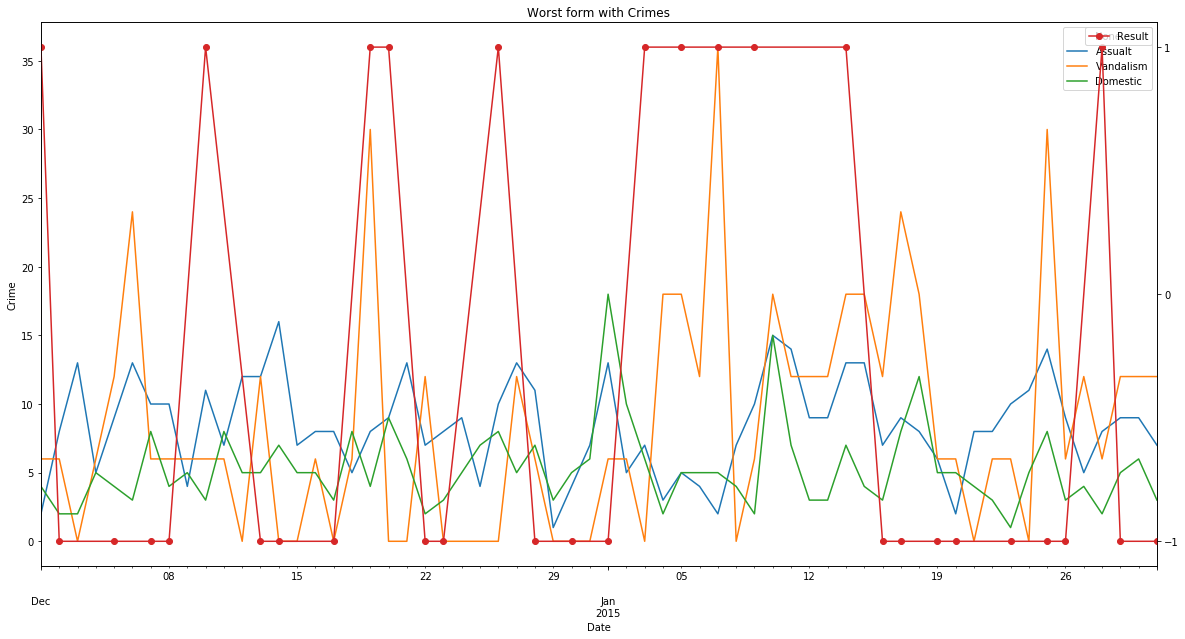

In [80]:
plt.subplot()

cp = nugcrime.loc['2014-12-01':'2015-01-31']
a1p = cp[cp['Description'] == "assault"]['Description']
a1p.resample('D').count().plot()

v1p = cp[cp['Description'] == "vandalism"]['Description']
v1p.resample('D').count().plot()

d1p = cp[cp['Description'] == "domestic"]['Description']
d1p.resample('D').count().plot()
plt.legend(['Assualt', 'Vandalism', 'Domestic'])
pylab.ylabel('Crime')
plt.title('Worst form with Crimes')

ctp = nugRes.loc['2014-12-01':'2015-01-31']
ctp['nug Res'].plot(style='o-', figsize = (20, 10), secondary_y = True).yaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend(['Result'])
plt.show

Vandalism sees spikes during wins and losses. Both domestic and vandalism highest points come after a loss.  

# Denver Nuggets Win/Lose Streaks

A function to create streak columns

In [81]:
def streaks(nugRes, col):
    sign = np.sign(nugRes[col])
    s = sign.groupby((sign!=sign.shift()).cumsum()).cumsum()
    return nugRes.assign(win_streak=s.where(s>0, 0.0), lose_streak=s.where(s<0, 0.0).abs())

Running that function and adding it to the nugRes dataframe..

In [82]:
nugRes = streaks(nugRes, 'nug Res')

In [83]:
nugRes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 371 entries, 2013-01-03 to 2017-04-12
Data columns (total 4 columns):
Start (ET)     371 non-null object
nug Res        371 non-null int32
lose_streak    371 non-null float64
win_streak     371 non-null float64
dtypes: float64(2), int32(1), object(1)
memory usage: 13.0+ KB


Sorting the dataframe by the losing streak column..

In [84]:
nugRes.sort_values(by=['lose_streak'], ascending= False).head()

,Start (ET),nug Res,lose_streak,win_streak
Date,,,,
2015-12-02,8:00 pm,-1,8.0,0.0
2014-01-01,9:00 pm,-1,8.0,0.0
2015-01-26,10:30 pm,-1,7.0,0.0
2015-11-30,8:00 pm,-1,7.0,0.0
2013-12-30,9:00 pm,-1,7.0,0.0


Analysing the period where the worst losing streak occurred...

<function matplotlib.pyplot.show>

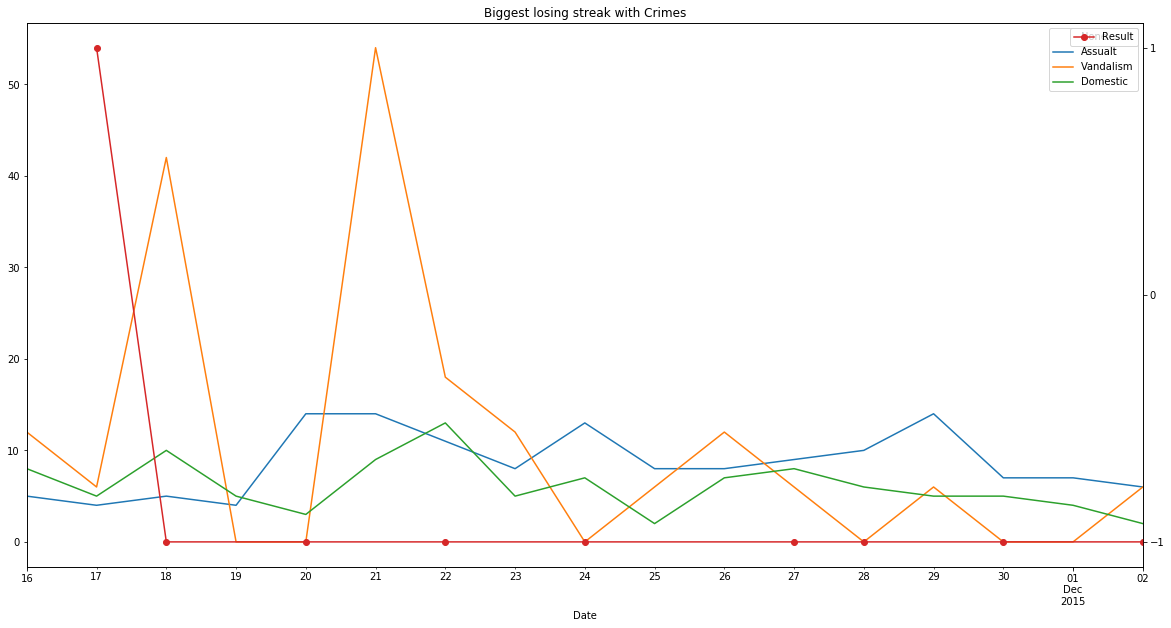

In [85]:
plt.subplot()

cp = nugcrime.loc['2015-11-16':'2015-12-02']
a1p = cp[cp['Description'] == "assault"]['Description']
a1p.resample('D').count().plot()

v1p = cp[cp['Description'] == "vandalism"]['Description']
v1p.resample('D').count().plot()

d1p = cp[cp['Description'] == "domestic"]['Description']
d1p.resample('D').count().plot()
plt.legend(['Assualt', 'Vandalism', 'Domestic'])

plt.title('Biggest losing streak with Crimes')

ctp = nugRes.loc['2015-11-16':'2015-12-02']
ctp['nug Res'].plot(style='o-', figsize = (20, 10), secondary_y = True).yaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend(['Result'])
plt.show

Text(0.5,1,'Longest losing streak with Crimes')

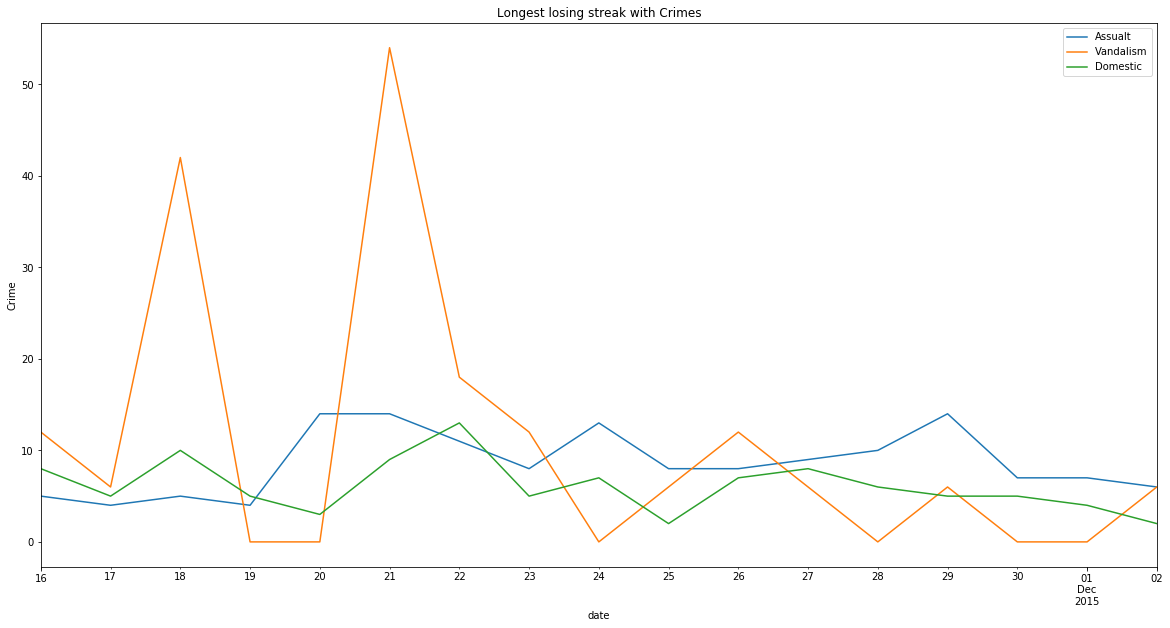

In [86]:
plt.subplot()

cp = nugcrime.loc['2015-11-16':'2015-12-02']
a1p = cp[cp['Description'] == "assault"]['Description']
a1p.resample('D').count().plot(figsize = (20, 10))

v1p = cp[cp['Description'] == "vandalism"]['Description']
v1p.resample('D').count().plot()

d1p = cp[cp['Description'] == "domestic"]['Description']
d1p.resample('D').count().plot()
plt.legend(['Assualt', 'Vandalism', 'Domestic'])
pylab.ylabel('Crime')
plt.title('Longest losing streak with Crimes')

Vandalism sees massive rises during this losing streak, reaching above 50 on a single day, however not on the day of a game. The streak doesn't seem to have an effect on Domestic or Assault. 

Sorting the dataframe by the win streak column

In [87]:
nugRes.sort_values(nugRes.columns[3], ascending = False).head()

,Start (ET),nug Res,lose_streak,win_streak
Date,,,,
2013-03-23,7:00 pm,1,0.0,15.0
2013-03-21,7:00 pm,1,0.0,14.0
2013-03-19,7:00 pm,1,0.0,13.0
2013-03-18,7:00 pm,1,0.0,12.0
2013-03-15,7:00 pm,1,0.0,11.0


Analysing the period where that win streak took place...

<function matplotlib.pyplot.show>

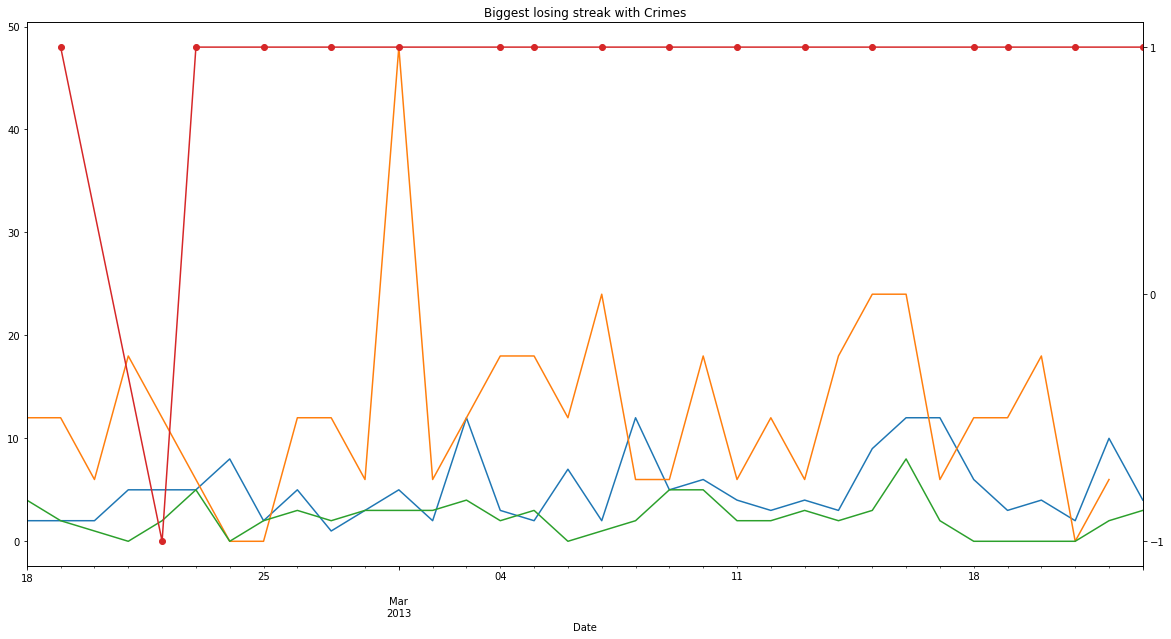

In [88]:
plt.subplot()

cp = nugcrime.loc['2013-02-18':'2013-03-23']
a1p = cp[cp['Description'] == "assault"]['Description']
a1p.resample('D').count().plot()

v1p = cp[cp['Description'] == "vandalism"]['Description']
v1p.resample('D').count().plot()

d1p = cp[cp['Description'] == "domestic"]['Description']
d1p.resample('D').count().plot()

plt.title('Biggest losing streak with Crimes')

ctp = nugRes.loc['2013-02-18':'2013-03-23']
ctp['nug Res'].plot(style='o-', figsize = (20, 10), secondary_y = True).yaxis.set_major_locator(MaxNLocator(integer=True))
plt.show

Text(0.5,1,'Longest win streak with Crimes')

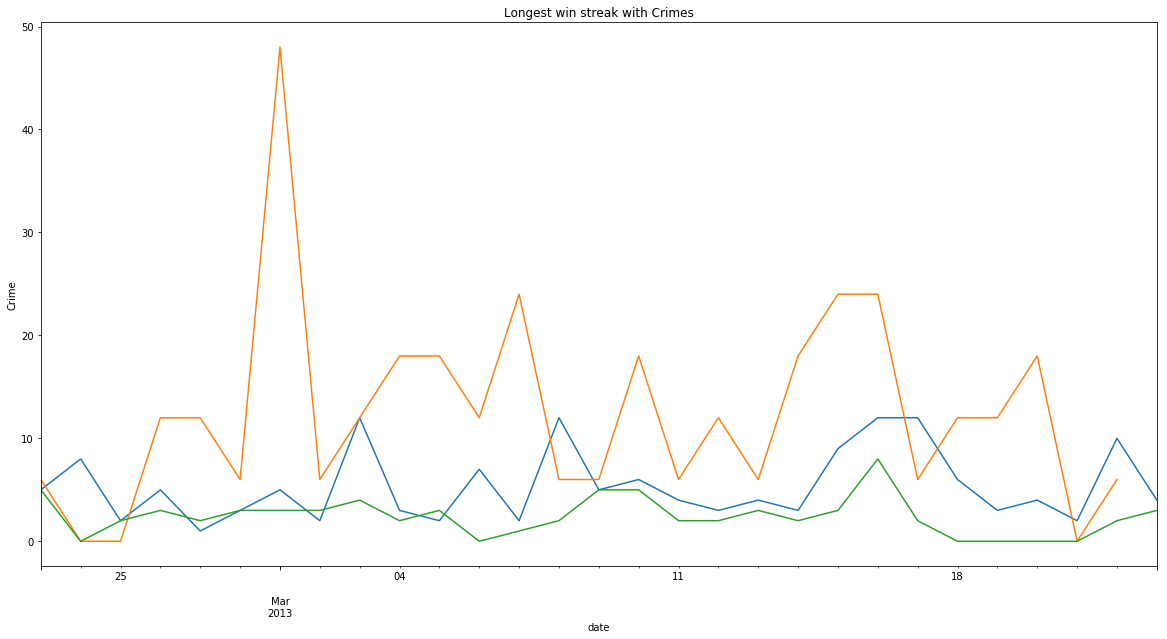

In [89]:
plt.subplot()

cp = nugcrime.loc['2013-02-23':'2013-03-23']
a1p = cp[cp['Description'] == "assault"]['Description']
a1p.resample('D').count().plot(figsize = (20, 10))

v1p = cp[cp['Description'] == "vandalism"]['Description']
v1p.resample('D').count().plot()

d1p = cp[cp['Description'] == "domestic"]['Description']
d1p.resample('D').count().plot()
pylab.ylabel('Crime')
plt.title('Longest win streak with Crimes')

This is the same period as shown in the 'good form' section above. 

### Comparing Longest Streaks

In [90]:
cp = nugcrime.loc['2015-11-18':'2015-12-02']

print('Daily average for Losing Streak:')
a1p = cp[cp['Description'] == "assault"]['Description']
assault = a1p.resample('D').count().mean()

v1p = cp[cp['Description'] == "vandalism"]['Description']
vandalism = v1p.resample('D').count().mean()

d1p = cp[cp['Description'] == "domestic"]['Description']
domestic = d1p.resample('D').count().mean()

print ('Assault =', assault)
print ('Vandalism =', vandalism)
print ('Domestic =', domestic)

print(' ')
print('Daily average for Winning Streak:')

cp0 = nugcrime.loc['2013-02-23':'2013-03-23']
a1p0 = cp0[cp0['Description'] == "assault"]['Description']
assault1 = a1p0.resample('D').count().mean()

v1p0 = cp0[cp0['Description'] == "vandalism"]['Description']
vandalism1 = v1p0.resample('D').count().mean()

d1p0 = cp0[cp0['Description'] == "domestic"]['Description']
domestic1 = d1p0.resample('D').count().mean()

print ('Assault =', assault1)
print ('Vandalism =', vandalism1)
print ('Domestic =', domestic1)



Daily average for Losing Streak:
Assault = 9.2
Vandalism = 10.8
Domestic = 6.066666666666666
 
Daily average for Winning Streak:
Assault = 5.379310344827586
Vandalism = 12.428571428571429
Domestic = 2.413793103448276


Assault and Domestic violence drop significantly on average during the win streak compared to the lose streak. Vandalism sees a rise which shows the winning streak hasn't improved the rates of crime in that respect. The period of time are different as well, as the losing streak came in November and the winning streak came in March, so timing could be a confounding factor. 

### Comparison with periods before Streaks

In [91]:
cp = nugcrime.loc['2013-01-23':'2013-02-23']

print('Period before Winning Streak')
a1p = cp[cp['Description'] == "assault"]['Description']
assault = a1p.resample('D').count().mean()

v1p = cp[cp['Description'] == "vandalism"]['Description']
vandalism = v1p.resample('D').count().mean()

d1p = cp[cp['Description'] == "domestic"]['Description']
domestic = d1p.resample('D').count().mean()

print ('Assault =', assault)
print ('Vandalism =', vandalism)
print ('Domestic =', domestic)

print(' ')
print('Period of Winning Streak:')

cp0 = nugcrime.loc['2013-02-23':'2013-03-23']
a1p0 = cp0[cp0['Description'] == "assault"]['Description']
assault1 = a1p0.resample('D').count().mean()

v1p0 = cp0[cp0['Description'] == "vandalism"]['Description']
vandalism1 = v1p0.resample('D').count().mean()

d1p0 = cp0[cp0['Description'] == "domestic"]['Description']
domestic1 = d1p0.resample('D').count().mean()

print ('Assault =', assault1)
print ('Vandalism =', vandalism1)
print ('Domestic =', domestic1)

Period before Winning Streak
Assault = 4.15625
Vandalism = 14.8125
Domestic = 1.84375
 
Period of Winning Streak:
Assault = 5.379310344827586
Vandalism = 12.428571428571429
Domestic = 2.413793103448276


Vandalism sees a marginal drop but apart from that there is no positive effect as a result of the winning streak.

In [92]:
cp = nugcrime.loc['2015-11-04':'2015-11-18']

print('Period before Losing Streak')
a1p = cp[cp['Description'] == "assault"]['Description']
assault = a1p.resample('D').count().mean()

v1p = cp[cp['Description'] == "vandalism"]['Description']
vandalism = v1p.resample('D').count().mean()

d1p = cp[cp['Description'] == "domestic"]['Description']
domestic = d1p.resample('D').count().mean()

print ('Assault =', assault)
print ('Vandalism =', vandalism)
print ('Domestic =', domestic)

print(' ')
print('Period of Losing Streak:')

cp0 = nugcrime.loc['2015-11-18':'2015-12-02']
a1p0 = cp0[cp0['Description'] == "assault"]['Description']
assault1 = a1p0.resample('D').count().mean()

v1p0 = cp0[cp0['Description'] == "vandalism"]['Description']
vandalism1 = v1p0.resample('D').count().mean()

d1p0 = cp0[cp0['Description'] == "domestic"]['Description']
domestic1 = d1p0.resample('D').count().mean()

print ('Assault =', assault1)
print ('Vandalism =', vandalism1)
print ('Domestic =', domestic1)

Period before Losing Streak
Assault = 9.066666666666666
Vandalism = 10.615384615384615
Domestic = 5.866666666666666
 
Period of Losing Streak:
Assault = 9.2
Vandalism = 10.8
Domestic = 6.066666666666666


There is a marginal rise in each crime during this period. The losing streak lasts for 8 games. The rise in crimes could be due to the losing streak. 